In [304]:
import pandas_datareader.data as web 
import datetime 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')
import yfinance as yf

In [305]:
stocks = ['KO', 'PEP', 'MNST', 'CABGY']

number_of_portfolios = 500
RF = 0.02

start_date = "2013-03-09"
end_date = "2023-03-13"

In [306]:
data = yf.download(stocks, start=start_date, end=end_date)
df = data['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [307]:
df.head()

,CABGY,KO,MNST,PEP
Date,,,,
2013-03-11,16.440266,28.478651,15.696667,57.680828
2013-03-12,16.440266,28.225082,15.396667,57.710850
2013-03-13,16.352564,28.159414,15.696667,57.755882
2013-03-14,16.567833,28.473181,15.710000,57.936024
2013-03-15,16.472157,28.334553,16.126667,57.823452


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2519 entries, 2013-03-11 to 2023-03-10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CABGY   2519 non-null   float64
 1   KO      2519 non-null   float64
 2   MNST    2519 non-null   float64
 3   PEP     2519 non-null   float64
dtypes: float64(4)
memory usage: 98.4 KB


In [309]:
portfolio_returns = []
portfolio_risk = []
portfolio_weights = []
portfolio_sharpe_ratios = []

In [310]:
my_weights = [0.25, 0.25, 0.25, 0.25]
portfolio_weights.append(my_weights)

for portfolio in range (number_of_portfolios):
    
    # geenrate random weights
    weights = np.random.random_sample(len(stocks))
    weights = np.round(weights/np.sum(weights), 2)
    portfolio_weights.append(weights)
    
    
    # calculate portfolio returns
    annualized_return = np.sum((df.pct_change().mean() * weights) * 252)
    portfolio_returns.append(annualized_return)

    # calculate portfolio risk
    matrix_covariance = df.pct_change().cov()
    portfolio_variance = np.dot(weights.T, np.dot(matrix_covariance, weights)) * 252
    portfolio_Standard_Deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_Standard_Deviation)
    
    # calculate portfolio sharpe ratio
    portfolio_sharpe_ratio = (annualized_return -RF) / portfolio_Standard_Deviation
    portfolio_sharpe_ratios.append(portfolio_sharpe_ratio)
    

In [311]:
print(portfolio_returns)

[0.19299398987983557, 0.1465726479847226, 0.13275021769747622, 0.11527189058167789, 0.14053771527043035, 0.1607084817823075, 0.14424915847522154, 0.14467880744499825, 0.1342606410361144, 0.1556153758091285, 0.12569282834953158, 0.1572300645169923, 0.11528111887957743, 0.10802080141306775, 0.13990267052444957, 0.11101880679697965, 0.11451357660373226, 0.16545160991865066, 0.13064340158601373, 0.15639706069574338, 0.13260341154481464, 0.14298116079128106, 0.10984393454973365, 0.13322058212570642, 0.12907176371023382, 0.11655188792248773, 0.1464779940833307, 0.11788757664915643, 0.138628468223256, 0.1183806500867425, 0.15894588903712933, 0.15150755014573755, 0.1593440312796953, 0.13923529305493865, 0.13972767818550869, 0.16109685386532857, 0.12346042719913061, 0.1277672975761019, 0.1406076020824642, 0.11695758355288513, 0.11689291619080339, 0.10685968860665734, 0.10339446791812446, 0.12759106774818338, 0.10872034210380807, 0.13482522878569192, 0.12429038777307624, 0.14422303577423923, 0.1

In [312]:
portfolio_returns = np.array(portfolio_returns)
portfolio_risk = np.array(portfolio_risk)
portfolio_sharpe_ratios = np.array(portfolio_sharpe_ratios) 
portfolio_metrics = [portfolio_returns, portfolio_risk, portfolio_sharpe_ratios, portfolio_weights]

In [313]:
port_df = pd.DataFrame(portfolio_metrics).T
port_df.columns = ['Returns', 'Risk', 'Sharpe Ratio', 'Weights']
port_df.dropna(inplace=True)
port_df

,Returns,Risk,Sharpe Ratio,Weights
0,0.192994,0.235202,0.735514,"[0.25, 0.25, 0.25, 0.25]"
1,0.146573,0.192691,0.656869,"[0.08, 0.03, 0.68, 0.22]"
2,0.13275,0.171671,0.65678,"[0.26, 0.31, 0.42, 0.01]"
3,0.115272,0.162679,0.585645,"[0.28, 0.13, 0.23, 0.36]"
4,0.140538,0.178687,0.674575,"[0.22, 0.31, 0.1, 0.37]"
...,...,...,...,...
495,0.102199,0.175629,0.468025,"[0.18, 0.1, 0.37, 0.36]"
496,0.105411,0.171531,0.497935,"[0.51, 0.18, 0.05, 0.26]"
497,0.118107,0.163617,0.599613,"[0.4, 0.44, 0.14, 0.01]"
498,0.121469,0.178193,0.569435,"[0.24, 0.21, 0.1, 0.45]"


In [314]:
df = port_df.copy()

In [315]:
stocks = ['KO', 'PEP', 'MNST', 'CABGY']

In [316]:
df['Ccola'] = df['Weights'].apply(lambda x: x[0])
df['Pepsi'] = df['Weights'].apply(lambda x: x[1])
df['Monster'] = df['Weights'].apply(lambda x: x[2])
df['Carlsberg'] = df['Weights'].apply(lambda x: x[3])

In [317]:
df.drop('Weights', axis=1, inplace=True)

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Returns       500 non-null    object 
 1   Risk          500 non-null    object 
 2   Sharpe Ratio  500 non-null    object 
 3   Ccola         500 non-null    float64
 4   Pepsi         500 non-null    float64
 5   Monster       500 non-null    float64
 6   Carlsberg     500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 31.2+ KB


In [319]:
df

,Returns,Risk,Sharpe Ratio,Ccola,Pepsi,Monster,Carlsberg
0,0.192994,0.235202,0.735514,0.25,0.25,0.25,0.25
1,0.146573,0.192691,0.656869,0.08,0.03,0.68,0.22
2,0.13275,0.171671,0.65678,0.26,0.31,0.42,0.01
3,0.115272,0.162679,0.585645,0.28,0.13,0.23,0.36
4,0.140538,0.178687,0.674575,0.22,0.31,0.10,0.37
...,...,...,...,...,...,...,...
495,0.102199,0.175629,0.468025,0.18,0.10,0.37,0.36
496,0.105411,0.171531,0.497935,0.51,0.18,0.05,0.26
497,0.118107,0.163617,0.599613,0.40,0.44,0.14,0.01
498,0.121469,0.178193,0.569435,0.24,0.21,0.10,0.45


In [320]:
df.to_csv('C:\\Users\\pc\\Desktop\\Studies\\BECODE\\Projects\\Portfolio_Forecasting_Optimization\\datas\\Portfolios.csv')

In [321]:
min_risk = port_df.iloc[port_df['Risk'].astype(float).idxmin()]   
min_risk

Returns                         0.104192
Risk                            0.161715
Sharpe Ratio                     0.52062
Weights         [0.17, 0.04, 0.43, 0.35]
Name: 205, dtype: object

In [322]:
high_return = port_df.iloc[port_df['Returns'].astype(float).idxmax()]   
high_return

Returns                         0.194635
Risk                            0.242958
Sharpe Ratio                    0.718786
Weights         [0.32, 0.03, 0.36, 0.29]
Name: 488, dtype: object

In [323]:
Best_SR = port_df.iloc[port_df['Sharpe Ratio'].astype(float).idxmax()]   
Best_SR

Returns                         0.170743
Risk                            0.200947
Sharpe Ratio                    0.750165
Weights         [0.16, 0.22, 0.21, 0.41]
Name: 408, dtype: object

In [324]:
My_Portfolio = port_df.loc[0]
My_Portfolio

Returns                         0.192994
Risk                            0.235202
Sharpe Ratio                    0.735514
Weights         [0.25, 0.25, 0.25, 0.25]
Name: 0, dtype: object

In [325]:
print('My Portfolio')
print(My_Portfolio)
print(stocks)
print('')

print('Min Risk')
print(min_risk)
print(stocks)
print('')


print('Highest Return')
print(high_return)
print(stocks)
print('')


print('Best Sharpe Ratio')
print(Best_SR)
print(stocks)
print('')

My Portfolio
Returns                         0.192994
Risk                            0.235202
Sharpe Ratio                    0.735514
Weights         [0.25, 0.25, 0.25, 0.25]
Name: 0, dtype: object
['KO', 'PEP', 'MNST', 'CABGY']

Min Risk
Returns                         0.104192
Risk                            0.161715
Sharpe Ratio                     0.52062
Weights         [0.17, 0.04, 0.43, 0.35]
Name: 205, dtype: object
['KO', 'PEP', 'MNST', 'CABGY']

Highest Return
Returns                         0.194635
Risk                            0.242958
Sharpe Ratio                    0.718786
Weights         [0.32, 0.03, 0.36, 0.29]
Name: 488, dtype: object
['KO', 'PEP', 'MNST', 'CABGY']

Best Sharpe Ratio
Returns                         0.170743
Risk                            0.200947
Sharpe Ratio                    0.750165
Weights         [0.16, 0.22, 0.21, 0.41]
Name: 408, dtype: object
['KO', 'PEP', 'MNST', 'CABGY']



In [326]:
df_best = pd.concat([My_Portfolio, min_risk, Best_SR, high_return], axis=1)

In [327]:
df_best.columns = ['My Portfolio', 'Min Risk', 'Best Sharpe Ratio', 'Highest Return']   

In [328]:
port_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Returns       500 non-null    object
 1   Risk          500 non-null    object
 2   Sharpe Ratio  500 non-null    object
 3   Weights       500 non-null    object
dtypes: object(4)
memory usage: 35.7+ KB


In [329]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Returns to Weights
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   My Portfolio       4 non-null      object
 1   Min Risk           4 non-null      object
 2   Best Sharpe Ratio  4 non-null      object
 3   Highest Return     4 non-null      object
dtypes: object(4)
memory usage: 332.0+ bytes


In [330]:
df_best.T

,Returns,Risk,Sharpe Ratio,Weights
My Portfolio,0.192994,0.235202,0.735514,"[0.25, 0.25, 0.25, 0.25]"
Min Risk,0.104192,0.161715,0.52062,"[0.17, 0.04, 0.43, 0.35]"
Best Sharpe Ratio,0.170743,0.200947,0.750165,"[0.16, 0.22, 0.21, 0.41]"
Highest Return,0.194635,0.242958,0.718786,"[0.32, 0.03, 0.36, 0.29]"


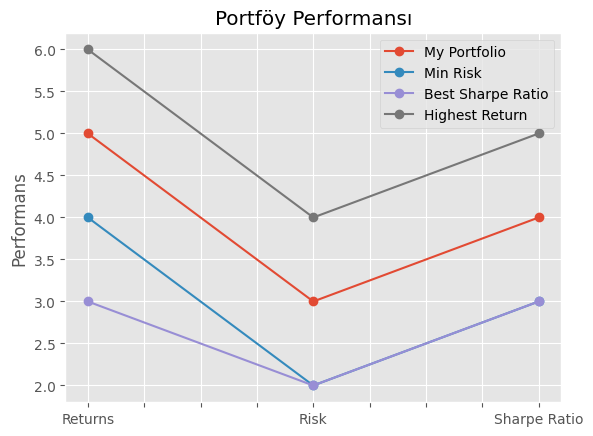

In [331]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri setini oluşturun
data = {'Returns': [5, 4, 3, 6], 'Risk': [3, 2, 2, 4], 'Sharpe Ratio': [4, 3, 3, 5]}
df = pd.DataFrame(data, index=['My Portfolio', 'Min Risk', 'Best Sharpe Ratio', 'Highest Return'])

# Çizgi grafiğini çizin
ax = df.T.plot(kind='line', marker='o')
ax.set_ylabel('Performans')
ax.set_title('Portföy Performansı')
plt.show()


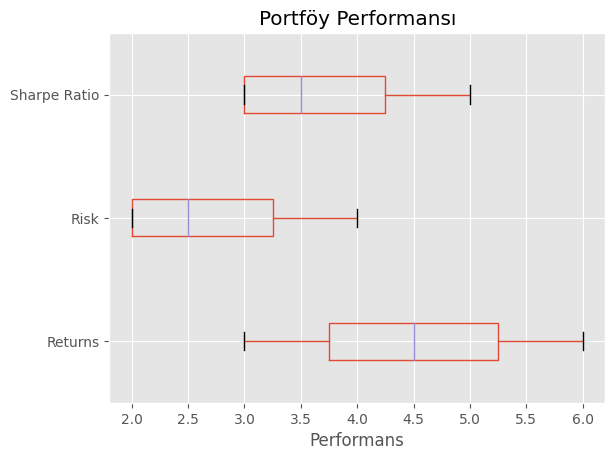

In [332]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri setini oluşturun
data = {'Returns': [5, 4, 3, 6], 'Risk': [3, 2, 2, 4], 'Sharpe Ratio': [4, 3, 3, 5]}
df = pd.DataFrame(data, index=['My Portfolio', 'Min Risk', 'Best Sharpe Ratio', 'Highest Return'])

# Box plotu çizin
fig, ax = plt.subplots()
df.boxplot(ax=ax, vert=False)
ax.set_xlabel('Performans')
ax.set_title('Portföy Performansı')
plt.show()


In [333]:
df_best.to_csv('C:\\Users\\pc\\Desktop\\Studies\\BECODE\\Projects\\Portfolio_Forecasting_Optimization\\datas\\BestPortfolio.csv')